In [14]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import yfinance as yf

ticker = "CIPLA.NS"  # Replace with the ticker symbol of the company you want to analyze
start_date = "2010-01-01"
end_date = "2020-12-31"

stock_prices_data = yf.download(ticker, start=start_date, end=end_date)

# stock_prices_data.to_csv("stock_prices_data.csv")

C:\Users\AneriSonani\AppData\Local\Programs\Python\Python310\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [16]:
stock_prices_data.to_csv("stock_prices_data.csv")

In [17]:
# Imports
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .appName("StockPrices")\
        .getOrCreate()

stock_prices_df = spark.read\
                .option("header", "true")\
                .option("inferSchema", "true")\
                .csv("stock_prices_data.csv")

In [18]:
# Imports
from pyspark.sql.functions import mean, stddev, corr

mean_price = stock_prices_df.select(mean("Close")).first()[0]
stddev_price = stock_prices_df.select(stddev("Close")).first()[0]
corr_price_volume = stock_prices_df.select(corr("Close", "Volume")).first()[0]

print("Mean Price:", mean_price)
print("Standard Deviation Price:", stddev_price)
print("Correlation between Price and Volume:", corr_price_volume)

Mean Price: 489.90980812230293
Standard Deviation Price: 133.51831822096568
Correlation between Price and Volume: 0.3101504137732027


In [19]:
pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


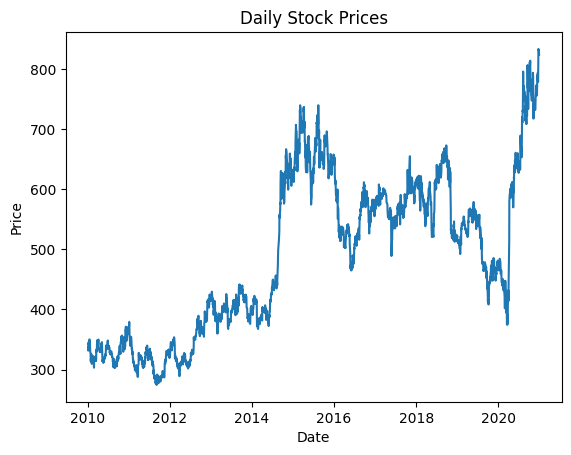

In [20]:
# Imports
import matplotlib.pyplot as plt

prices = stock_prices_df.select("Date", "Close").collect()
dates = [row.Date for row in prices]
prices = [row.Close for row in prices]

plt.plot(dates, prices)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Daily Stock Prices")
plt.show()